In [1]:
import os
import json

import numpy as np
import iohinspector as ins 

import matplotlib.pyplot as plt

In [2]:
data = "../../data/"
folders = os.listdir(data)

def json_files(path):
    items = os.listdir(path)
    return [os.path.join(path, i) for i in items if i.endswith("json")]



algs = (
    "CMA-ES-SOBOL-GAUSSIAN",
    "CMA-ES-SOBOL-SCALED_UNIFORM",
    "CMA-ES-SOBOL-GAUSSIAN-cache-128",
    "CMA-ES-SOBOL-SCALED_UNIFORM-cache-128",
)

for alg in algs:
    with open(json_files(os.path.join(data, alg))[16]) as f:
        json_data = json.load(f)

    print(json_data['algorithm']['name'], "on f", json_data['function_id'], )
    for scen in json_data['scenarios']:
        # if scen['dimension'] not in (5,):
            # continue
        
        run_data = []
        for run in scen['runs']:
            run_data.append((run['evals'], run['best']['y']))
            
        run_data = np.array(run_data)
        print(
            "dim:",
            scen['dimension'], 
            np.median(run_data[:,0]), 
            np.std(run_data[:,0]),
            "--",
            np.median(run_data[:,1]), 
            np.std(run_data[:,1])
        )
        # break
        

CMA-ES-SOBOL-GAUSSIAN on f 1
dim: 2 234.0 26.629389778964143 -- 3.5728638462118155e-09 2.7505036009095284e-09
dim: 3 385.0 34.68858457763879 -- 5.612303770847728e-09 2.6888957865020597e-09
dim: 5 672.0 49.44873709206333 -- 7.057953291468231e-09 2.1488913373968558e-09
dim: 10 1425.0 76.35830013822991 -- 7.672043951575843e-09 1.6135276205773494e-09
dim: 20 2694.0 109.67363220026955 -- 8.799210894426044e-09 9.657254389336532e-10
dim: 40 5212.5 169.80132508316888 -- 9.122290059088797e-09 8.372552852506697e-10
CMA-ES-SOBOL-SCALED_UNIFORM on f 1
dim: 2 258.0 23.649135290745832 -- 4.496006899609996e-09 2.6245732103140133e-09
dim: 3 434.0 38.084117424459244 -- 6.342292398103247e-09 2.7147392678283936e-09
dim: 5 752.0 57.77329486882326 -- 7.239633332150912e-09 2.064424238489845e-09
dim: 10 1510.0 80.83780056384514 -- 7.975880678869524e-09 1.432847214352347e-09
dim: 20 2760.0 122.60048287017472 -- 8.921013454789064e-09 1.2380451335077898e-09
dim: 40 5115.0 180.61046481308884 -- 9.109080362689448

In [3]:
manager = ins.DataManager()

for alg in algs:
    manager.add_folder(os.path.join(data, alg))


/usr/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [4]:
manager.overview

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y
u64,str,str,str,str,u16,u16,u16,u32,u64,f64
1,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,1,1,582,3.8082e-9
2,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,2,2,612,8.1100e-9
3,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,3,3,588,2.8578e-9
4,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,4,4,648,1.2300e-9
5,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,5,5,606,7.0796e-10
…,…,…,…,…,…,…,…,…,…,…
57596,"""CMA-ES-SOBOL-SCALED_UNIFORM-ca…","""algorithm_info""","""unknown_suite""","""Schwefel""",20,40,96,96,400002,1.722377
57597,"""CMA-ES-SOBOL-SCALED_UNIFORM-ca…","""algorithm_info""","""unknown_suite""","""Schwefel""",20,40,97,97,400002,1.5892
57598,"""CMA-ES-SOBOL-SCALED_UNIFORM-ca…","""algorithm_info""","""unknown_suite""","""Schwefel""",20,40,98,98,400005,2.058152


In [5]:
df = manager.load(True, True)
df

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,evaluations,raw_y
u64,str,str,str,str,u16,u16,u16,u32,u64,f64,u64,f64
1,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,1,1,582,3.8082e-9,1,2.9688e7
1,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,1,1,582,3.8082e-9,2,2.0790e7
1,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,1,1,582,3.8082e-9,4,5.9905e6
1,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,1,1,582,3.8082e-9,11,638126.704788
1,"""CMA-ES-SOBOL-GAUSSIAN""","""algorithm_info""","""unknown_suite""","""EllipsoidRotated""",10,2,1,1,582,3.8082e-9,15,3329.475363
…,…,…,…,…,…,…,…,…,…,…,…,…
57600,"""CMA-ES-SOBOL-SCALED_UNIFORM-ca…","""algorithm_info""","""unknown_suite""","""Schwefel""",20,40,100,100,400014,1.51015,71891,1.51015
57600,"""CMA-ES-SOBOL-SCALED_UNIFORM-ca…","""algorithm_info""","""unknown_suite""","""Schwefel""",20,40,100,100,400014,1.51015,71931,1.51015
57600,"""CMA-ES-SOBOL-SCALED_UNIFORM-ca…","""algorithm_info""","""unknown_suite""","""Schwefel""",20,40,100,100,400014,1.51015,72059,1.51015


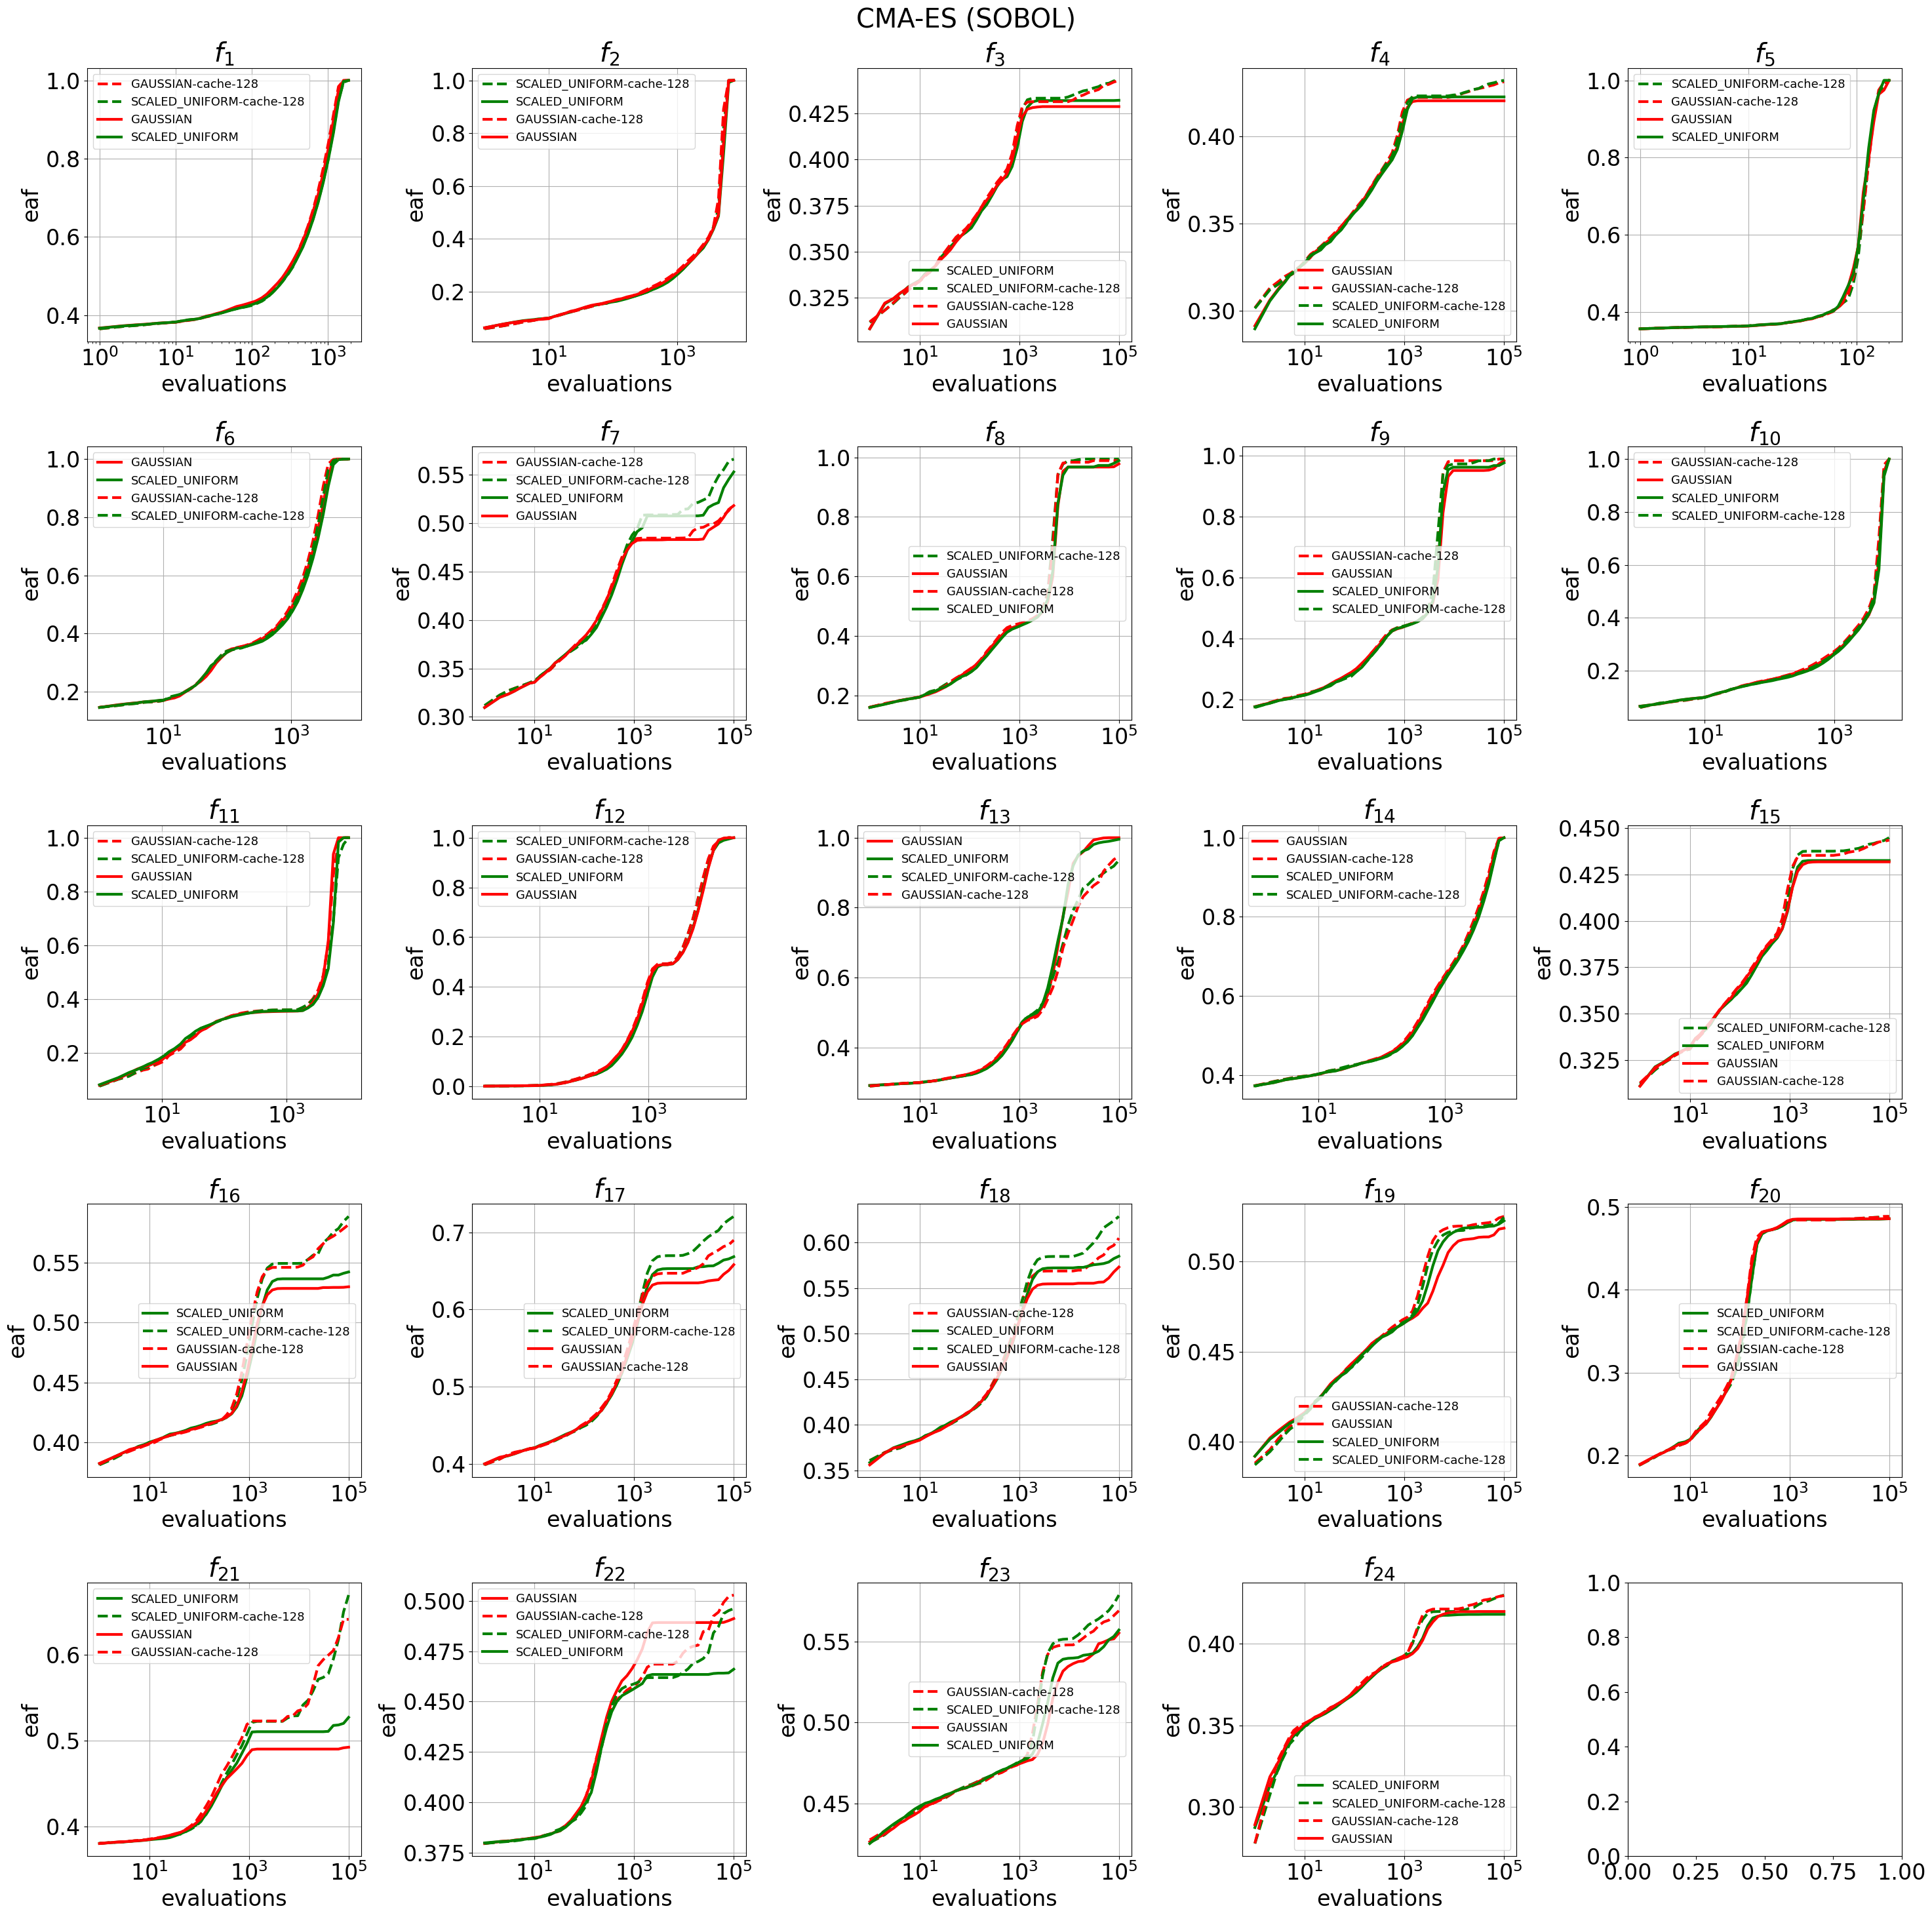

In [6]:
import polars as pl

f, axes = plt.subplots(5, 5, figsize=(30, 30))

colors = dict(zip(algs, "rgrg"))


f.suptitle("CMA-ES (SOBOL)")
for fid, ax in enumerate(axes.ravel(), 1):
    if fid > 24: break
    pdata = df.filter((pl.col("function_id") == fid) & (pl.col('dimension') == 10))
    dt = ins.plot.plot_ecdf(pdata.sort(by='algorithm_name'), ax=ax)
    # ax.grid(which='minor', axis='both')
    
    lines = ax.get_lines()[::]
    for line, line_label in zip(lines[:len(lines)//2], lines[len(lines)//2:]):
        if (lab:=line_label.get_label()) in colors:
            for l in (line, line_label):
                l.set_color(colors[lab])
                l.set_linewidth(3)  
                if lab.endswith("128"):
                    l.set_linestyle('dashed')  
                else:
                    l.set_linestyle('solid')  
               
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:], [l[13:] for l in labels[:]], fontsize=13)
    ax.set_title(f"$f_{{{fid}}}$")

plt.tight_layout()

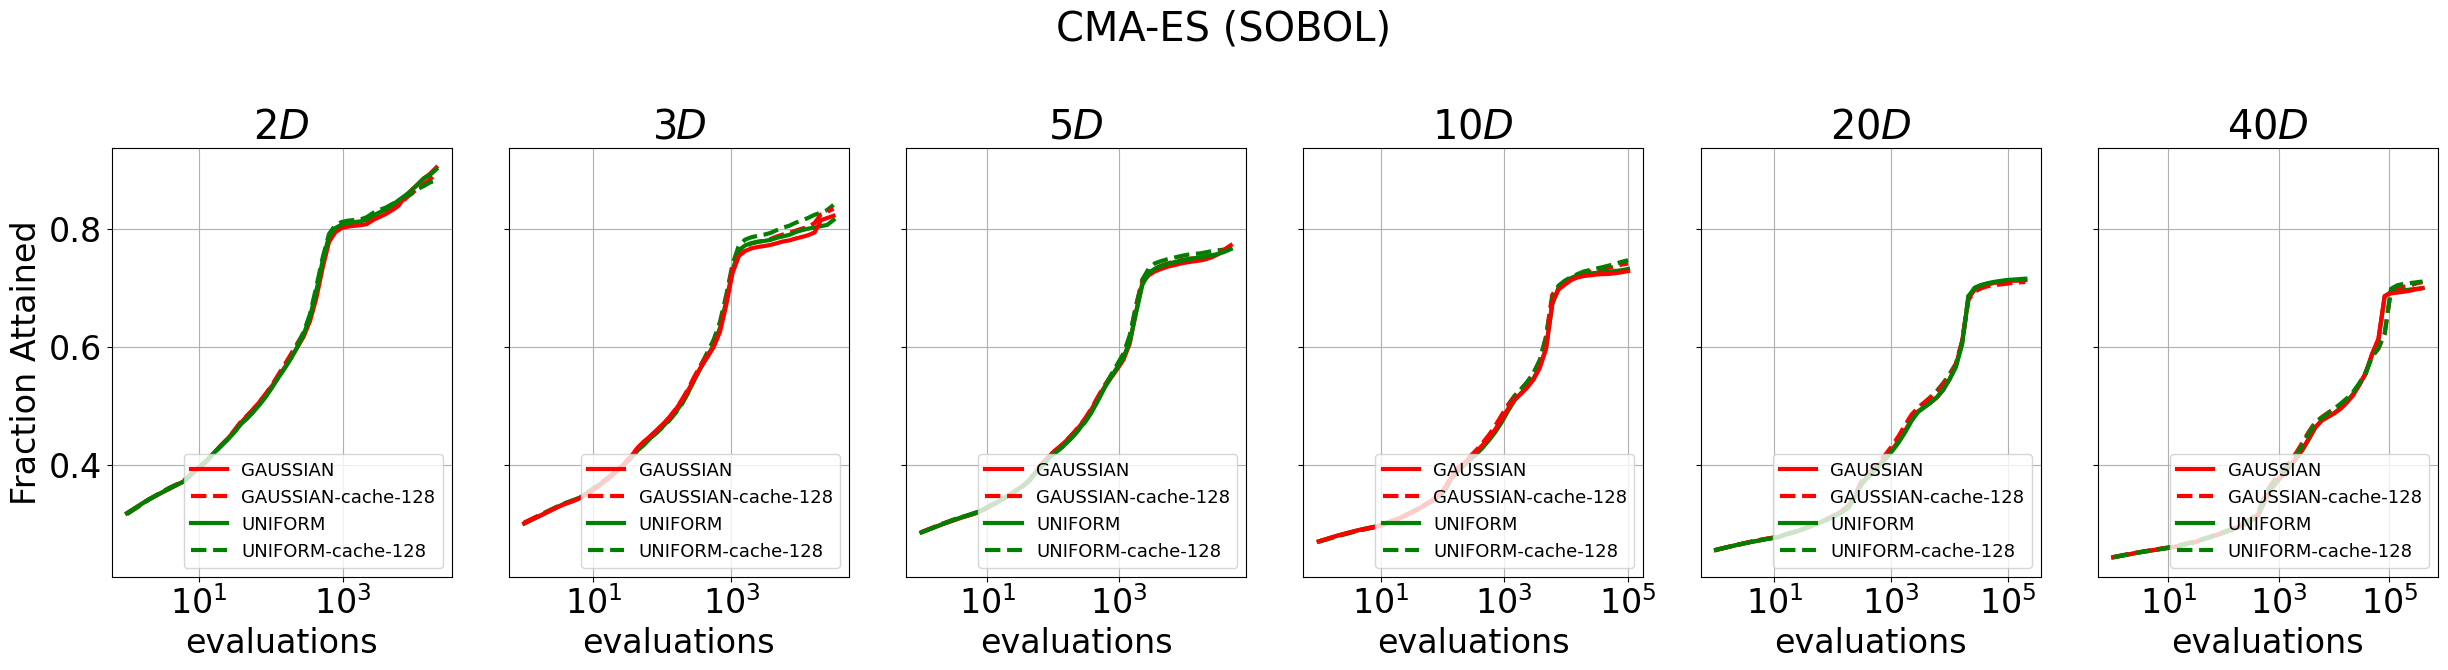

: 

In [ ]:
f, axes = plt.subplots(1, 6, figsize=(25, 7), sharey=True)

colors = dict(zip(algs, "rgrg"))

f.suptitle("CMA-ES (SOBOL)")
for dim, ax in zip((2, 3, 5, 10, 20, 40), axes.ravel()):
    pdata = df.filter((pl.col("dimension") == dim))
    dt = ins.plot.plot_ecdf(pdata.sort(by='algorithm_name'), ax=ax)
    # ax.grid(which='minor', axis='both')
    
    lines = ax.get_lines()[::]
    for line, line_label in zip(lines[:len(lines)//2], lines[len(lines)//2:]):
        if (lab:=line_label.get_label()) in colors:
            for l in (line, line_label):
                l.set_color(colors[lab])
                l.set_linewidth(3)  
                if lab.endswith("128"):
                    l.set_linestyle('dashed')  
                else:
                    l.set_linestyle('solid')  
               
    handles, labels = ax.get_legend_handles_labels()
    labels = [l[13:] if 'GAUS' in l else l[20:] for l in labels[:]]
    idx = np.argsort(labels)
    ax.legend(np.array(handles)[idx], np.array(labels)[idx], fontsize=13, loc='lower right')
    ax.set_title(f"${dim}D$")
    ax.set_ylabel("Fraction Attained")

plt.tight_layout()